In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
cuisine=pd.read_csv(r"C:\Users\personal\Desktop\Blessing Data Analyst Portfolio\restaurants  - Sheet1.csv", index_col=False)
cuisine

,name,max seats,price per plate,stars,views,min seats,region
0,Ardor 2.1 Restaurant & Lounge,150,850,4.5,22466,10.0,central delhi
1,Hotel Amara,100,1000,4.5,1715,10.0,south delhi
2,Southwest Inn,150,850,3.0,946,10.0,south delhi
3,2 Fup of Hotel Country Inn & Suites,125,1200,4.3,4883,10.0,south delhi
4,Banquet of Bite Bikaner,100,700,4.4,5490,30.0,south west delhi
...,...,...,...,...,...,...,...
494,narulas,50,500,3.0,871,10.0,central delhi
495,pal inn,80,500,3.0,116,5.0,west delhi
496,love grill,50,400,2.0,42,10.0,north east delhi
497,adish restaurant,100,500,3.0,1296,5.0,south delhi


In [33]:
top_10_bymax=cuisine[["name", "max seats"]].sort_values(by= "max seats").tail(10)
top_10_bymax.set_index("name", inplace=True)

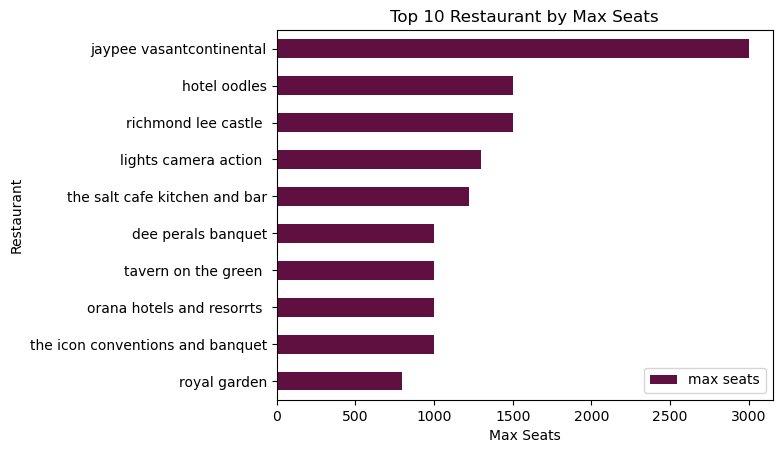

In [132]:
top_10_bymax.plot(kind= "barh", color="#5F0F40")
plt.xlabel("Max Seats")
plt.ylabel("Restaurant")
plt.title("Top 10 Restaurant by Max Seats")
plt.savefig("Top Restaurant", transparent=True)

In [68]:
avg_byregion=cuisine.groupby("region")["price per plate"].agg("mean")

In [64]:
cuisine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             499 non-null    object 
 1   max seats        499 non-null    int64  
 2   price per plate  499 non-null    float64
 3   stars            499 non-null    float64
 4   views            499 non-null    int64  
 5   min seats        499 non-null    float64
 6   region           499 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 27.4+ KB


In [63]:
cuisine["price per plate"]= cuisine["price per plate"].astype("float")
# i converted it to float by stripping using the regex function thing omo
#cuisine['price per plate'] = cuisine['price per plate'].str.replace('[^\d.]', '', regex=True).astype(float)


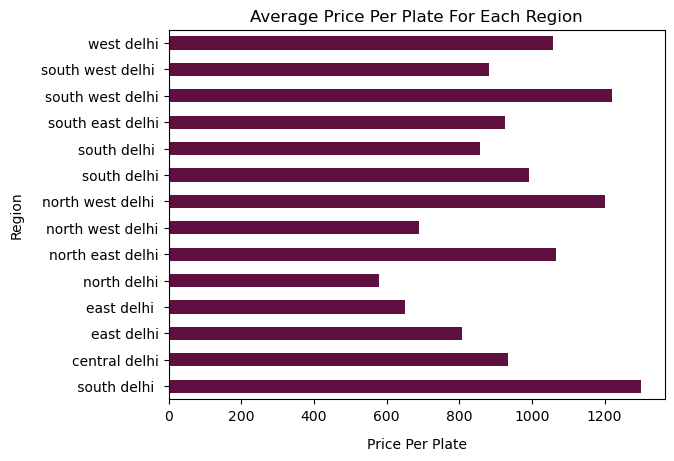

In [127]:
avg_byregion.plot(kind="barh", color="#5F0F40")
plt.title("Average Price Per Plate For Each Region")
plt.xlabel("Price Per Plate", labelpad=10.0)
plt.ylabel("Region", labelpad=12.0)
plt.savefig("price per plate")

In [70]:
avg_byregion

region
 south delhi         1300.000000
central delhi         935.432099
east delhi            809.000000
east delhi            650.000000
north delhi           579.166667
north east delhi     1066.666667
north west delhi      690.068750
north west delhi     1200.000000
south delhi           992.134454
south delhi           855.882353
south east delhi      927.055556
south west delhi     1221.320000
south west delhi      883.333333
west delhi           1058.179577
Name: price per plate, dtype: float64

In [80]:
cuisine[cuisine["name"]== "jaypee vasantcontinental"]

,name,max seats,price per plate,stars,views,min seats,region
323,jaypee vasantcontinental,3000,1500.0,4.0,331,200.0,south west delhi


In [87]:
four_stars=cuisine["stars"]>=4.0
cuisine[four_stars]
#we can plot somthing like a card to represent it , we'd need to draw a rectangle tho but that's for later

,name,max seats,price per plate,stars,views,min seats,region
0,Ardor 2.1 Restaurant & Lounge,150,850.0,4.5,22466,10.0,central delhi
1,Hotel Amara,100,1000.0,4.5,1715,10.0,south delhi
3,2 Fup of Hotel Country Inn & Suites,125,1200.0,4.3,4883,10.0,south delhi
4,Banquet of Bite Bikaner,100,700.0,4.4,5490,30.0,south west delhi
5,Banquet Hall of The Terrace Sandoz,300,750.0,4.5,920,50.0,north west delhi
...,...,...,...,...,...,...,...
478,yellow multicusine restaurant and party lounge,100,450.0,4.0,77,10.0,north west delhi
479,diggin cafe chanakyapuri,80,1100.0,4.0,239,10.0,south delhi
480,marine drivve club and courtyard,250,1100.0,4.0,621,4.0,west delhi
488,kiara soul kitchen,4,1250.0,4.0,322,3.0,south delhi


In [92]:
rating_byregion=cuisine.groupby("region")["stars"].agg("mean")
rating_byregion

region
 south delhi         2.000000
central delhi        3.487654
east delhi           3.490909
east delhi           2.000000
north delhi          3.133333
north east delhi     3.161111
north west delhi     3.440000
north west delhi     3.500000
south delhi          3.500840
south delhi          3.200000
south east delhi     3.575000
south west delhi     3.368000
south west delhi     3.222222
west delhi           3.338028
Name: stars, dtype: float64

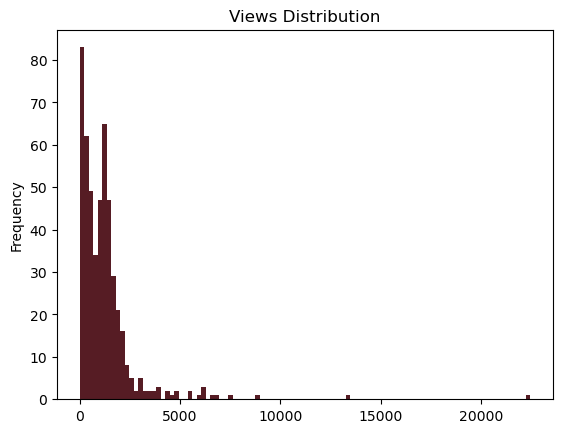

In [129]:
cuisine["views"].plot(kind="hist", color="#561C24", bins=100)
plt.title("Views Distribution")
plt.savefig("Views")

In [105]:
cuisine["min seats"].mode()

0    10.0
Name: min seats, dtype: float64

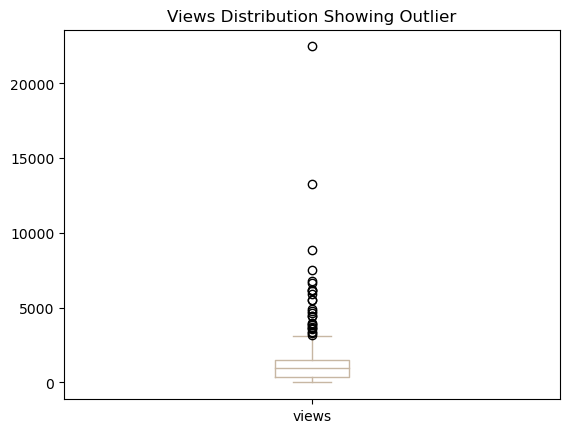

In [131]:
cuisine["views"].plot(kind="box", color="#C7B7A3")
plt.title("Views Distribution Showing Outlier")
plt.savefig("Views2")

In [108]:
cuisine[cuisine["views"]>20000]

,name,max seats,price per plate,stars,views,min seats,region
0,Ardor 2.1 Restaurant & Lounge,150,850.0,4.5,22466,10.0,central delhi


(array([2., 1., 0., 2., 3., 1., 2., 0., 2., 1.]),
 array([ 579.16666667,  651.25      ,  723.33333333,  795.41666667,
         867.5       ,  939.58333333, 1011.66666667, 1083.75      ,
        1155.83333333, 1227.91666667, 1300.        ]),
 <BarContainer object of 10 artists>)

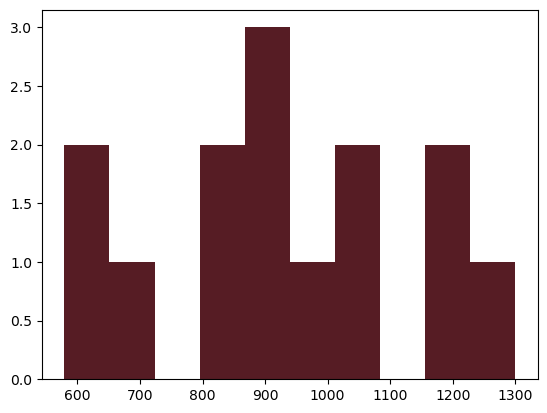

In [114]:
plt.hist(x=avg_byregion, color="#561C24")

In [115]:
dist= cuisine[["region", "price per plate"]]

(array([[499.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [485.,  11.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]]),
 array([0.0, 2200.0, 4400.0, 6600.0, 8800.0, 11000.0, 13200.0, 15400.0,
        17600.0, 19800.0, 22000.0], dtype=object),
 <a list of 2 BarContainer objects>)

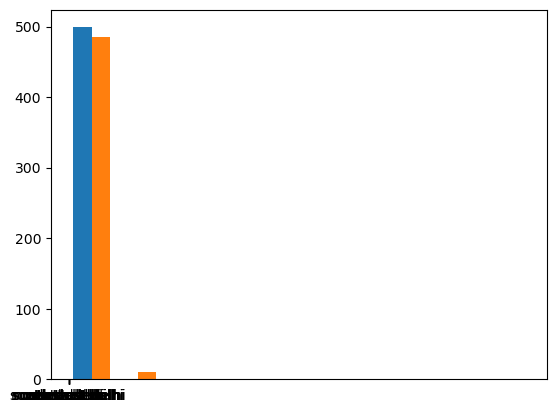